# TP 3 Regression linéaire
Dans ce TP, nous aimerions prédire l'admission d'un étudiant à une specialité donnée selon ses notes dans deux matières.

Pour ce faire, nous étudierons un ensemble de données avec l'admission  (y) et les notes des deux modules (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [16]:
import numpy as np
import matplotlib.pyplot as plt


# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [17]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=int)
data.shape

(100, 3)

In [18]:
data[:5]

array([[ 6, 15,  0],
       [ 6,  8,  0],
       [ 7, 14,  0],
       [12, 17,  1],
       [15, 15,  1]])

Dans ces données (data), la première colonne represente la première note, la deuxieme colonne la deuxième note et la troisième colonne represente l'admission à la specialité (1 admis 0 non admis).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [19]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0:2]))
y = data[:, 2]

In [20]:
print('X', X.shape ,' y ', y.shape)

X (100, 3)  y  (100,)


# Descente du Gradient : Préparation des fonctions

0- Fonction mpgistique (Sigmoid)

In [21]:
def Sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
    return (1 / (1 + np.exp(-z)))
 

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [22]:
def computeCost(X, y, theta):
    
    m = len(y) 
    predict = Sigmoid(np.dot(X, theta)) #Caluler h theta de X
    error = y * (np.log(predict)) + ((1 - y) * np.log(1 - predict)) 
    cost = (-(1/m) * np.sum(error))
    return cost

computeCost(X, y, [0,0,0])
  

0.6931471805599453

In [23]:
# calculer le coût sans vectorisation
def computeCostNonVect(X, y, theta):
    m = X.shape[0]
    z = []
    predict = np.zeros(m)
    
    # pour chaque element du dataset on calcule la prédiction en utilisant le vecteur theta
    for i in range(m):
        z = X[i][0]*theta[0] + X[i][1]*theta[1] + X[i][2]*theta[2]
        predict[i] = Sigmoid(z)
        
    
    # somme des erreurs 
    cout = 0
    for i in range(m):
        cout = cout + (y[i] * (np.log(predict)[i]) + ((1 - y[i]) * np.log(1 - predict[i])))
    
    return -(1 / m) * cout

computeCostNonVect(X, y, [0,0,0])

0.693147180559946

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [24]:
def model (X,theta):
    return Sigmoid(np.dot(X, theta))


In [25]:
def grad(X , y , theta): #Calculer le gradient
    m = len(y)
    gradient = X.T.dot(model(X, theta) - y)
    return (1/m)* gradient

In [26]:
def gradientDescent(X, y, theta, alpha, iterations):

    cost_history = np.zeros(iterations) #Sauvegarder l'historique du cout
    
    for i in range(iterations):
        theta = theta - alpha * grad( X, y , theta)
        cost_history[i] = computeCost(X, y, theta)
        
    return cost_history , theta


# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [27]:
y = y.reshape(-1, 1)

In [28]:
n=X.shape[1]
theta = np.zeros((n, 1))
theta

array([[0.],
       [0.],
       [0.]])

Calculer le cout initial

In [29]:
initialCost=computeCost(X, y, theta)
print(initialCost)

0.6931471805599453


Appel des la fonction de calcul du gradient

In [30]:
# paramètres
iterations = 1000000
alpha = 0.01
# Appel
cost_history, theta = gradientDescent(X, y, theta, alpha, iterations)

In [31]:
cost_history[-1]

0.2060560859754641

In [32]:
#LR = 0.01
    # (itérations) -> cost 

    # (1500) -> 0.56
    # (10 000) -> 0.382
    # (100 000) -> 0.2250
    # (500 000 or 700 000) -> 0.2065 - 0.2061
    # (1 000 000) -> 0.20605 

#LR = 0.03
    # (100 000) -> 0.2084

#LR = 0.1 
    # (30 000) ->  0.206097
    # (100 000) -> 0.206044
    # (500 000) -> 0.206042

#Analyse
    #Avec un learning rate plus grand, la fonction cout converge bien plus vite (elle à besoin de beacoup moins d'itération)

    #Cependant, au debut, le cout est instable et plus le learning rate est grand plus l'instabilité du cout durant 
    #les premières itérations est grande.

    #Cela dit, le cout minimal reste à peut près le même peut importe le learning rate

In [33]:
theta

array([[-23.78260274],
       [  1.0207137 ],
       [  0.98483397]])

Traçage de la fonction du coût

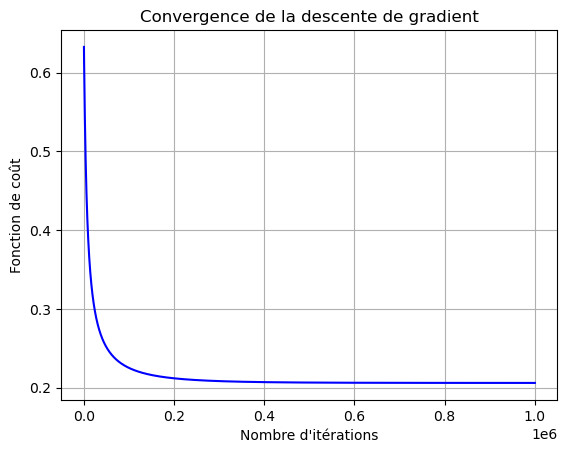

In [34]:
# Tracer la convergence de la fonction de coût
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid()
plt.xlabel('Nombre d\'itérations')
plt.ylabel('Fonction de coût')
plt.title('Convergence de la descente de gradient')
plt.show()

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

# Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

In [35]:
def drawLine():

    plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="accepte",marker ='o')
    plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="non accepte",marker ='x')

    boundary_xs = np.array([np.min(X[:,1]), np.max(X[:,1])]) #La plage de valeurs sur laquelle les y de la ligne de regression seront calculées
    boundary_ys = (-1. / theta[2]) * (theta[1] * boundary_xs + theta[0]) #les valeurs de la ligne de regression (decision boundary)

    plt.plot(boundary_xs, boundary_ys, 'r-', label='Decision Boundary')
    
    plt.xlabel('Note module 1')
    plt.ylabel('Note module 2')
    plt.legend()
    plt.show()
    


# Affichage 
Graphe representant les acceptations selon les caracteristiques

Text(0, 0.5, 'Note module 2')

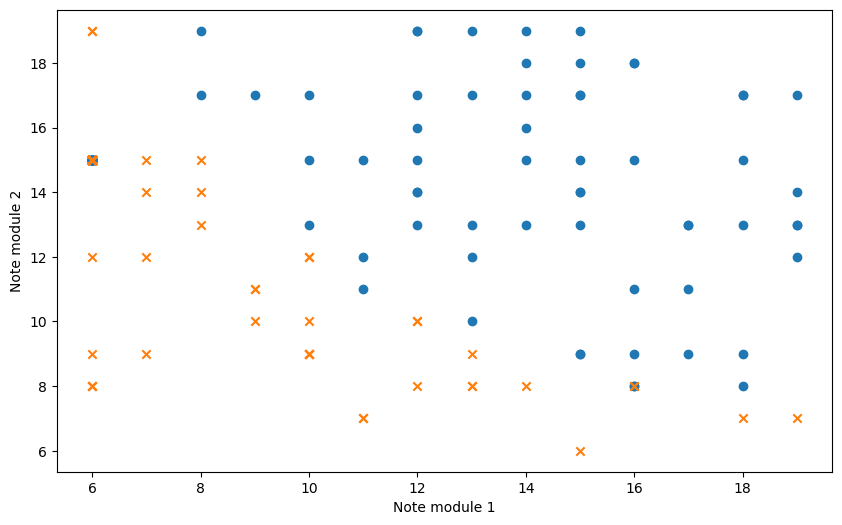

In [36]:
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="accepte",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="non accepte",marker ='x')

plt.xlabel('Note module 1')
plt.ylabel('Note module 2')

Traçage du coût en fonction de theta0 et theta1

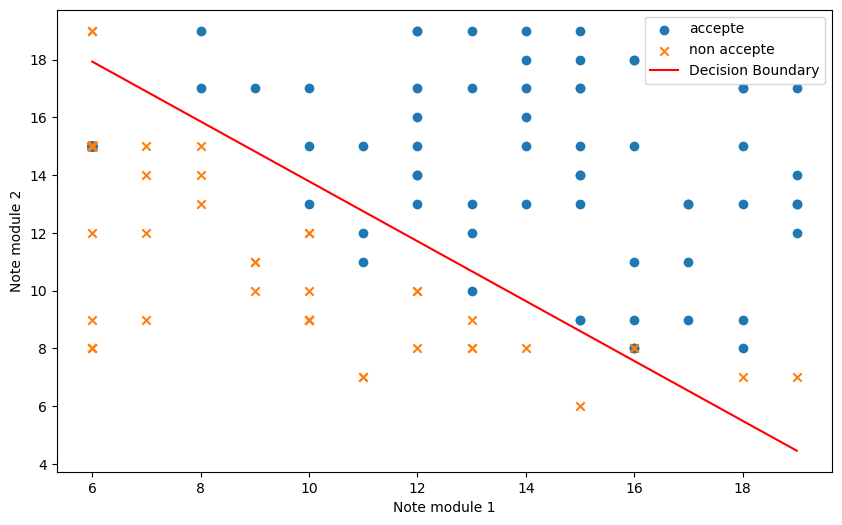

In [37]:
drawLine()

Prédire des valeurs de y

In [38]:
# Predire pour des notes note1= 9 et note2=17
for i in range (len(X)): #Trouver le tuple note1= 9 et note2=17 dans le dataset
    if ((X[i,1] == 9) and (X[i,2] == 17)): 
        x = X[i]
        break

print("Row =",i)
print("X =",x)
print("y = ",y[i])

y_pred = model(x, theta)
print("Prediction =", y_pred, "\tClass =", [0 if y_pred<=0.5 else 1 ])

Row = 76
X = [ 1.  9. 17.]
y =  [1]
Prediction = [0.89529421] 	Class = [1]


In [39]:
#Prédictions pour tous le dataset
y_pred = model(X, theta)
predictions = [0 if proba<=0.5 else 1 for proba in y_pred]

for i in range(10): #Affichage des 10 premières prédictions
    print("y =",y[i],"\ty_pred =", round(float(y_pred[i]), 10), "\tpred_class =", predictions[i])
    
print("")

y = [0] 	y_pred = 0.0528594475 	pred_class = 0
y = [0] 	y_pred = 5.65885e-05 	pred_class = 0
y = [0] 	y_pred = 0.0546848679 	pred_class = 0
y = [1] 	y_pred = 0.9945579313 	pred_class = 1
y = [1] 	y_pred = 0.9981681809 	pred_class = 1
y = [0] 	y_pred = 0.0226872013 	pred_class = 0
y = [1] 	y_pred = 0.9992372422 	pred_class = 1
y = [1] 	y_pred = 0.5966698394 	pred_class = 1
y = [1] 	y_pred = 0.999744052 	pred_class = 1
y = [1] 	y_pred = 0.6052737088 	pred_class = 1



C:\Users\linai\AppData\Local\Temp\ipykernel_16816\406596851.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("y =",y[i],"\ty_pred =", round(float(y_pred[i]), 10), "\tpred_class =", predictions[i])


# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [40]:
from sklearn.linear_model import LogisticRegression

X_sk = data[:,0:2]
y = data[:,2]

logreg = LogisticRegression(random_state=16)
logreg.fit(X_sk, y)

y_pred_sk = logreg.predict(X_sk[80:, :])

In [41]:
#Label Originale
y[80:]

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [42]:
#Predictions de sklearn
y_pred_sk

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [43]:
#Predictions de notre modèle
predictions[80:] 

[1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1]

In [44]:
#On peut voir que les prédictions de sklearn et les notres sont les mêmes pour les 20 dérnières valeurs du dataset

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

# Consignes

In [808]:
# bonne chance